## Sensitivity attribute:
Choosing race as the sensitive attribute in the COMPAS dataset for binary tasks acknowledges biases, ensures fairness, aligns with legal standards, promotes algorithmic transparency, and addresses societal impacts, aiming for equitable and accountable AI decisions.

## Dataset source:
Dataset source:https://www.kaggle.com/datasets/danofer/compass

## Dataset description:
The dataset contains information on individuals' criminal history, demographics, and recidivism risk scores from the COMPAS system.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

keras = tf.keras
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.callbacks import EarlyStopping
np.random.seed(42)
tf.random.set_seed(42)


In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head(10)

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0
2,1,4,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,1
4,1,14,1,0,0,0,0,0,0,0,0,0
5,0,3,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,1,1
7,0,0,0,0,0,0,0,0,0,0,0,0
8,1,3,1,0,1,1,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6172 entries, 0 to 6171
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Two_yr_Recidivism     6172 non-null   int64
 1   Number_of_Priors      6172 non-null   int64
 2   score_factor          6172 non-null   int64
 3   Age_Above_FourtyFive  6172 non-null   int64
 4   Age_Below_TwentyFive  6172 non-null   int64
 5   African_American      6172 non-null   int64
 6   Asian                 6172 non-null   int64
 7   Hispanic              6172 non-null   int64
 8   Native_American       6172 non-null   int64
 9   Other                 6172 non-null   int64
 10  Female                6172 non-null   int64
 11  Misdemeanor           6172 non-null   int64
dtypes: int64(12)
memory usage: 578.8 KB


In [5]:
x = data.drop('Two_yr_Recidivism', axis=1)

y = data['Two_yr_Recidivism']

In [6]:
x.shape, y.shape


((6172, 11), (6172,))

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [8]:
# Import necessary layers for building the model
from keras.layers import Dense, Dropout, BatchNormalization

# Define the input layer with the shape corresponding to the number of features in the training data
inputs = keras.Input(shape=(x_train.shape[1],))

# Add a Dense layer with 64 neurons and ReLU activation function
x = Dense(64, activation='relu')(inputs)

# Normalize the activations of the previous layer at each batch, i.e., applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.
x = BatchNormalization()(x)

# Apply Dropout to prevent overfitting by randomly setting a fraction of input units to 0 at each update during training time, which helps prevent overfitting.
x = Dropout(0.5)(x)

# Add another Dense layer with 32 neurons and ReLU activation function
x = Dense(32, activation='relu')(x)

# Normalize the activations of the previous layer
x = BatchNormalization()(x)

# Apply Dropout again for regularization
x = Dropout(0.5)(x)

# Define the output layer with a single neuron and sigmoid activation function to output probabilities
outputs = Dense(1, activation='sigmoid')(x)

# Construct the model by specifying its inputs and outputs
model = keras.Model(inputs, outputs)


# Set up the model with the Adam optimizer, binary cross-entropy loss, and accuracy metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print a summary of the model's architecture
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense (Dense)               (None, 64)                768       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                             

In [9]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=1 / 3, callbacks=[early_stopping])
# Save model after training
model.save('./weights/compas_model_weights.h5')

Epoch 1/20
103/103 [==============================] - 1s 4ms/step - loss: 0.7941 - accuracy: 0.5843 - val_loss: 0.6288 - val_accuracy: 0.6847
Epoch 2/20
103/103 [==============================] - 0s 2ms/step - loss: 0.7129 - accuracy: 0.6269 - val_loss: 0.6168 - val_accuracy: 0.6707
Epoch 3/20
103/103 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.6266 - val_loss: 0.6106 - val_accuracy: 0.6774
Epoch 4/20
103/103 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.6405 - val_loss: 0.6060 - val_accuracy: 0.6829
Epoch 5/20
103/103 [==============================] - 0s 2ms/step - loss: 0.6449 - accuracy: 0.6557 - val_loss: 0.6032 - val_accuracy: 0.6877
Epoch 6/20
103/103 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.6566 - val_loss: 0.6016 - val_accuracy: 0.6877
Epoch 7/20
103/103 [==============================] - 0s 2ms/step - loss: 0.6337 - accuracy: 0.6554 - val_loss: 0.6016 - val_accuracy: 0.6896
Epoch 

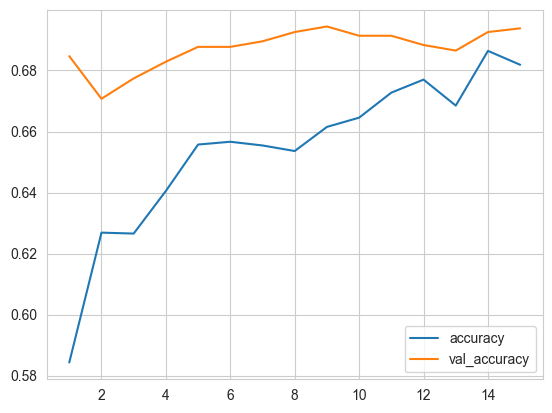

In [10]:
# Define the range for the x-axis based on the number of epochs
x = range(1, len(history.history['accuracy']) + 1)

# Plot training accuracy per epoch
plt.plot(x, history.history['accuracy'], label='accuracy')

# Plot validation accuracy per epoch for comparison
plt.plot(x, history.history['val_accuracy'], label='val_accuracy')

# Add legend to differentiate between training and validation accuracy
plt.legend()

# Display the plot
plt.show()


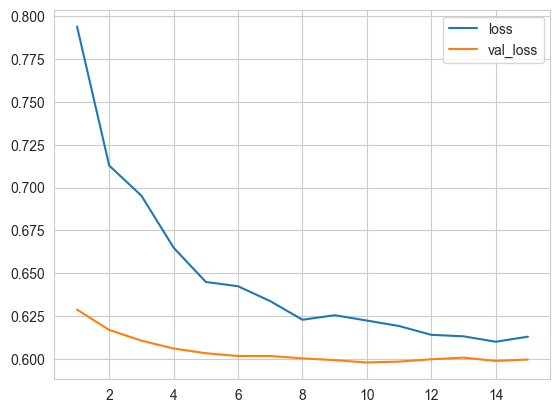

In [11]:
# Plot training loss per epoch
plt.plot(x, history.history['loss'], label='loss')

# Plot validation loss per epoch for comparison
plt.plot(x, history.history['val_loss'], label='val_loss')

# Add legend to differentiate between training and validation loss
plt.legend()

# Display the plot
plt.show()


In [12]:
# Evaluate the model on the test set to get the loss and accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)

39/39 [==============================] - 0s 1ms/step - loss: 0.6179 - accuracy: 0.6640


In [13]:
# Print the accuracy of the model on the test set, rounding to two decimal places
print(f'General model accuracy on test_set is {round(test_acc * 100, 2)}%')

# Use the model to make predictions on the test set
predictions = model.predict(x_test)
# Print the raw prediction probabilities
print(predictions)

General model accuracy on test_set is 66.4%
39/39 [==============================] - 0s 1ms/step
[[0.7256825 ]
 [0.31007507]
 [0.40450674]
 ...
 [0.7316118 ]
 [0.3149599 ]
 [0.67161727]]


In [14]:
# Calculate the confusion matrix by comparing actual labels (y_test) to predicted labels
# Predicted labels are determined by thresholding the predictions at 0.5
cm = tf.math.confusion_matrix(y_test, predictions > 0.5)
# Print or inspect the confusion matrix to evaluate model performance further
print(cm)

tf.Tensor(
[[511 172]
 [243 309]], shape=(2, 2), dtype=int32)


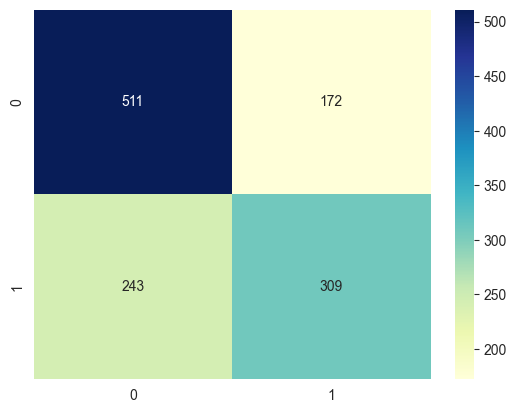

In [15]:
# use heatmap to show cm
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()


In [16]:
# Initialize lists to hold data for African American individuals and individuals from other races
african_americans = []
other_races = []

# Initialize lists to hold labels corresponding to the two groups above
african_americans_labels = []
other_races_labels = []

# Iterate over each row in the test set dataframe (x_test)
for row_idx, row in x_test.iterrows():
    # Check if the current row represents an African American individual
    if row.loc['African_American'] == 1:
        # If yes, append the row to the African Americans list
        african_americans.append(row)
        # And append the corresponding label to the African Americans labels list
        african_americans_labels.append(y_test[row_idx])
    else:
        # If not, append the row to the Other Races list
        other_races.append(row)
        # And append the corresponding label to the Other Races labels list
        other_races_labels.append(y_test[row_idx])


In [17]:
african_americans_df = pd.DataFrame(african_americans).reset_index().drop('index', axis=1)

african_americans_df.head(10)

,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
0,13,1,0,0,1,0,0,0,0,0,1
1,2,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,1,0
3,2,1,0,0,1,0,0,0,0,0,0
4,0,1,0,1,1,0,0,0,0,0,0
5,9,1,0,0,1,0,0,0,0,0,0
6,2,1,0,1,1,0,0,0,0,0,1
7,5,0,0,0,1,0,0,0,0,0,0
8,1,0,1,0,1,0,0,0,0,0,0
9,0,0,1,0,1,0,0,0,0,0,0


In [18]:
other_races_df = pd.DataFrame(other_races).reset_index().drop('index', axis=1)
other_races_df.head(10)

,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
0,1,0,0,0,0,0,1,0,0,0,1
1,0,0,0,1,0,0,1,0,0,0,1
2,1,1,0,1,0,0,0,0,0,1,0
3,3,0,0,0,0,0,0,0,0,0,1
4,8,1,0,0,0,0,0,0,1,0,0
5,3,1,0,0,0,0,0,0,0,1,1
6,0,0,0,1,0,0,1,0,0,0,0
7,2,0,0,0,0,0,1,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,1,1,1


In [19]:
def predict_and_show_cm(received_test_data, labels):
    # Predict labels using the model
    m_predictions = model.predict(received_test_data)

    # Calculate the confusion matrix
    cm = tf.math.confusion_matrix(labels, m_predictions > 0.5)

    # Plot the confusion matrix as a heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

    # Set labels for x and y axes
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

    # Display the plot
    plt.show()

    return m_predictions


## African Americans

20/20 [==============================] - 0s 1ms/step


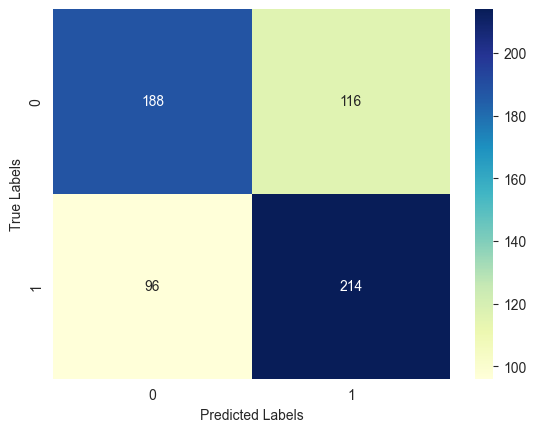

In [20]:
african_americans_predictions = predict_and_show_cm(african_americans_df, african_americans_labels)

## Other races



20/20 [==============================] - 0s 1ms/step


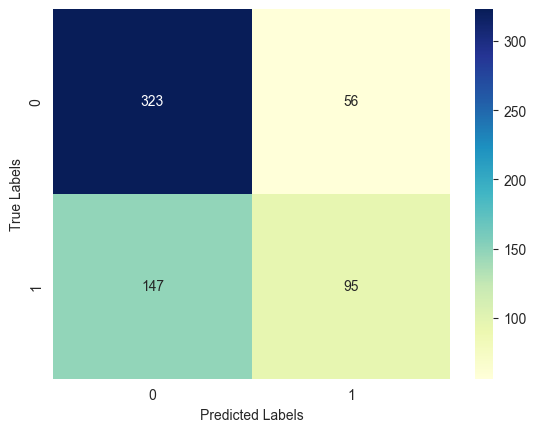

In [21]:
other_races_predictions = predict_and_show_cm(other_races_df, other_races_labels)

## Fairness approach
In my selection process for an evaluation metric focused on fairness, I chose Recall due to its sensitivity towards minimizing False Positives in my model's context, which utilizes the COMPAS dataset for risk classification. This decision underscores the importance of accurately identifying individuals who truly pose a high risk while being mindful of the detrimental impact of mistakenly categorizing low-risk individuals as high-risk. By emphasizing Recall, I aim to ensure that the model accurately captures as many genuine high-risk cases as possible without unjustly classifying low-risk individuals, thereby reducing the chance of unfairly penalizing someone. This approach reflects a commitment to fairness by prioritizing the accurate identification of those in need of intervention and minimizing the risk of adverse consequences for individuals wrongly classified as high-risk. 
All things considered, my main goal is to minimize False Positives and assess True Positive and True Negative Rates.

## Worldview
I'm choosing the WYSIWYG approach because it aligns with the reliable and accurate nature of my data. It ensures that my model's predictions reflect real-world patterns and are transparent and justifiable. This approach matches domain knowledge and regulatory requirements, confirming that disparities in data are factual and should be mirrored in predictive outcomes.



## Fairness function

In [22]:
def calculate_true_false_values(received_predictions, labels):
    received_predictions = received_predictions > 0.5

    cm = tf.math.confusion_matrix(labels, received_predictions)

    true_positive = cm[1][1]

    false_positive = cm[0][1]

    true_negative = cm[0][0]

    false_negative = cm[1][0]

    print(f'''True Positive: {true_positive}
False Positive: {false_positive}
True Negative: {true_negative}
False Negative: {false_negative}''')

    return true_positive.numpy(), false_positive.numpy(), true_negative.numpy(), false_negative.numpy()


In [23]:
def calculate_positive_negative_rates(*args):
    TP, FP, TN, FN = args[0]
    P = TP + FN

    N = TN + FP
    rates = {
        'race': args[1],
        'br': P / (P + N),
        'pr': TP + FP / (P + N),
        'nr': TN + FN / (P + N),
        'acc': (TP + TN) / (P + N),
        'mr': FN + FP / (P + N),
        'tpr': TP / P,
        'tnr': TN / N,
        'fpr': FP / N,
        'fnr': FN / P,
        'fdr': FP / (TP + FP),
        'ppv': TP / (TP + FP),
        'for': FN / (FN + TN),
        'npv': TN / (TN + FN),
        'p': P,
        'n': N,
        'most_common_metrics': {
            'fdr': FP / (TP + FP),
            'for': FN / (FN + TN),
            'pr': TP + FP / (P + N),
            'nr': TN + FN / (P + N),
        }

    }

    return rates

In [24]:
african_american_rates = calculate_positive_negative_rates(
    calculate_true_false_values(african_americans_predictions, african_americans_labels), 'African American')

True Positive: 214
False Positive: 116
True Negative: 188
False Negative: 96


In [25]:
other_races_rates = calculate_positive_negative_rates(
    calculate_true_false_values(other_races_predictions, other_races_labels), 'Other races')

True Positive: 95
False Positive: 56
True Negative: 323
False Negative: 147


##  Predictive equality 
Predictive Equality is a fairness metric that focuses on ensuring that the false positive rates (FPR) are equal across different groups. In predictive equality, the idea is to balance the rate at which individuals from each group are incorrectly predicted to be the positive class (in many contexts, this is the less favorable outcome).

In [26]:
def calculate_predictive_equality(rate1, rate2):
    # Create subplots for the bar chart
    fig, ax = plt.subplots()

    # Set the title of the plot
    ax.set_title('Predictive Equality')

    # Set the y-axis label
    ax.set_ylabel('False Positive Rate (fpr)')

    # Create a bar chart comparing False Positive Rate for African American and Other races
    ax.bar(['African American', 'Other races'], [rate1['fpr'], rate2['fpr']])

    # Display the plot
    plt.show()


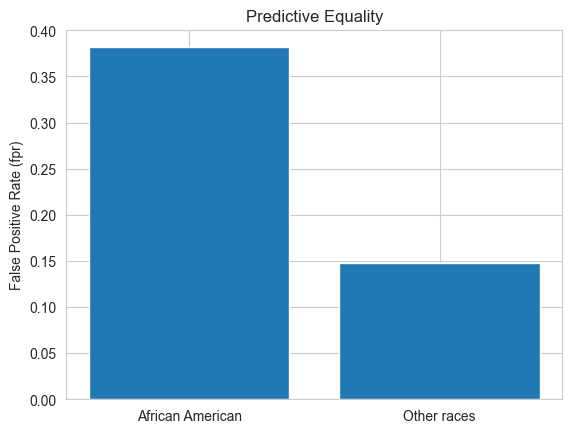

In [27]:
calculate_predictive_equality(african_american_rates, other_races_rates)

**Implications**
The chart displaying Predictive Equality indicates that my model is more likely to falsely identify African American individuals as high risk compared to individuals from other races. The False Positive Rate (FPR) for African Americans is considerably higher, which means my model is disproportionately misclassifying African Americans as being at a higher risk of recidivism when they are not. 

This higher FPR is critical to my evaluation of the model’s fairness because it signifies the likelihood of mistakenly labeling someone as high-risk when they are low-risk. The noticeable bias against African Americans reflected by this higher FPR suggests that my model's predictive bias is unfairly skewed against them, making it more prone to making erroneous high-risk predictions for this group.

##  Equalized Odds
Fairness definition called equalised odds aims at equal
true positive and true negative rates. The reasoning behind
this concept is that the probabilities of being correctly classified
should be the same for everyone. 

In [28]:
# This function calculates and visualizes the Equalized Odds metric for fairness evaluation.
def calculate_equalized_odds(rate1, rate2):
    # Create subplots with a figure size of (15, 5)
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Set the title of the entire figure
    fig.suptitle('Equalized Odds')

    # Set the ylabel for the first subplot
    ax[0].set_ylabel('True Positive Rate (tpr)')

    # Create a bar chart for True Positive Rate for both African American and Other races in the first subplot
    ax[0].bar(['African American', 'Other races'], [rate1['tpr'], rate2['tpr']])

    # Set the ylabel for the second subplot
    ax[1].set_ylabel('True Negative Rate (tnr)')

    # Create a bar chart for True Negative Rate for both African American and Other races in the second subplot
    ax[1].bar(['African American', 'Other races'], [rate1['tnr'], rate2['tnr']], color='red')
    
   
    
    # Display the plot
    plt.show()


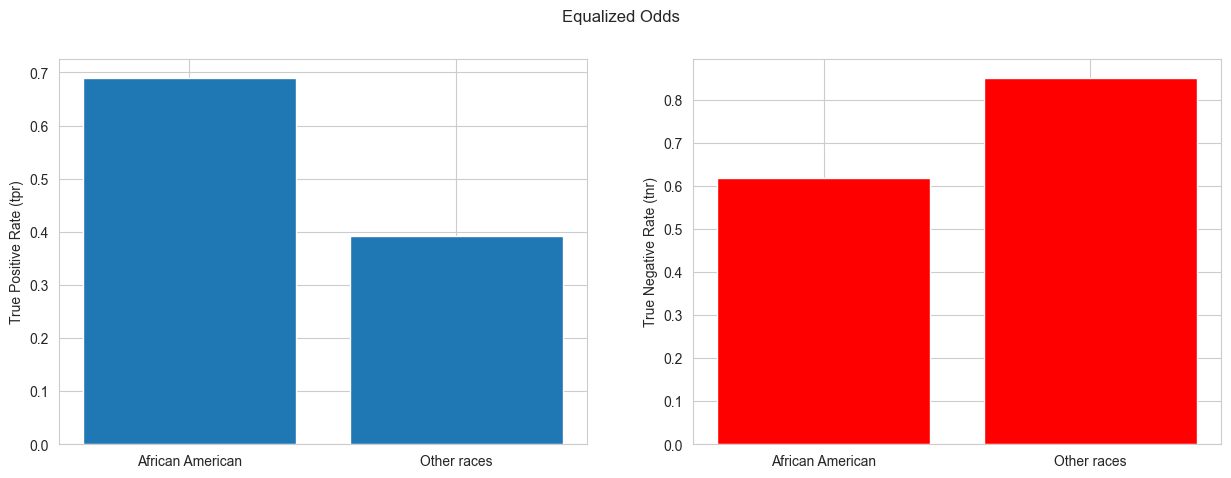

In [29]:
calculate_equalized_odds(african_american_rates, other_races_rates)

**Interpreting the Equalized Odds Metric:**
- **High TPR for African Americans:** The high TPR indicates that the model is sensitive to detecting genuine high-risk cases among African Americans, which is crucial for preventing potential recidivism. This sensitivity can lead to appropriate interventions and support for those at actual risk.

- **Low TNR for African Americans:** The lower TNR for African Americans suggests that the model is more likely to misclassify low-risk individuals from this group as high-risk, leading to potential negative consequences such as unnecessary scrutiny or interventions.

**Concerns and Addressing Bias:**

- The disparity in TPR and TNR between African Americans and other racial groups indicates a potential bias in the model. This bias could stem from various factors such as imbalanced training data or biased features used in the model.

The ultimate goal is to achieve a balanced TPR and TNR across different racial groups, ensuring that the model's predictions are both fair and effective in identifying genuine risks while avoiding unnecessary hardships for low-risk individuals.

In [30]:
# Main function to assess and compare fairness across two groups
def taxonomy_function(class_1_preds, class_1_labels, class_1_name, class_2_preds, class_2_labels, class_2_name):

    # This function displays confusion matrices for two different classes and saves them as files
    def show_cms(class_1_preds, class_1_labels, class_2_preds, class_2_labels, class_1_name, class_2_name):
        # Setup the figure with two subplots
        fig, ax = plt.subplots(1, 2, figsize=(15, 5))
        
        # Compute confusion matrix for the first class
        class_1_cm = confusion_matrix(class_1_labels, class_1_preds > 0.5)
        # Compute confusion matrix for the second class
        class_2_cm = confusion_matrix(class_2_labels, class_2_preds > 0.5)
        
        # Plot the confusion matrix for the first class
        ax[0].set_title(f'{class_1_name} Confusion Matrix')
        sns.heatmap(class_1_cm, annot=True, fmt='d', cmap='YlGnBu', ax=ax[0])
        ax[0].set_xlabel('Predicted Labels')
        ax[0].set_ylabel('True Labels')
        
        # Plot the confusion matrix for the second class
        ax[1].set_title(f'{class_2_name} Confusion Matrix')
        sns.heatmap(class_2_cm, annot=True, fmt='d', cmap='YlGnBu', ax=ax[1])
        ax[1].set_xlabel('Predicted Labels')
        ax[1].set_ylabel('True Labels')
        
        # Show the plots
        plt.show()
        
        # Save the confusion matrices as .npy files for further analysis
        np.save(f'{class_1_name}_cm.npy', class_1_cm)
        np.save(f'{class_2_name}_cm.npy', class_2_cm)
        
        # Return the confusion matrices for additional processing if needed
        return class_1_cm, class_2_cm
    
    # This function calculates the confusion matrix values from predictions and true labels
    def calculate_true_false_values(predictions, labels):
        # Apply threshold to predictions to create binary outcome
        predictions = predictions > 0.5
        # Generate confusion matrix from predictions and labels
        cm = tf.math.confusion_matrix(labels, predictions)
        # Extract true positive, false positive, true negative, false negative
        true_positive = cm[1][1]
        false_positive = cm[0][1]
        true_negative = cm[0][0]
        false_negative = cm[1][0]
        # Convert tensor values to numpy for further processing
        return true_positive.numpy(), false_positive.numpy(), true_negative.numpy(), false_negative.numpy()

    # This function calculates various rates from confusion matrix values
    def calculate_positive_negative_rates(values, class_name):
        TP, FP, TN, FN = values
        P = TP + FN  # Total positive cases
        N = TN + FP  # Total negative cases
        
        # Calculate metrics based on confusion matrix values
        rates = {
            'name': class_name,  # Class name identifier
            'br': P / (P + N),  # Base rate
            'pr': (TP + FP) / (P + N),  # Positive rate
            'nr': (TN + FN) / (P + N),  # Negative rate
            'acc': (TP + TN) / (P + N),  # Accuracy
            'mr': (FN + FP) / (P + N),  # Misclassification rate
            'tpr': TP / P,  # True positive rate
            'tnr': TN / N,  # True negative rate
            'fpr': FP / N,  # False positive rate
            'fnr': FN / P,  # False negative rate
            'fdr': FP / (TP + FP),  # False discovery rate
            'ppv': TP / (TP + FP),  # Positive predictive value
            'for': FN / (FN + TN),  # False omission rate
            'npv': TN / (TN + FN),  # Negative predictive value
            'p': P,  # Total positives
            'n': N,  # Total negatives
            # Common metrics that may be of particular interest
            'most_common_metrics': {
                'fdr': FP / (TP + FP),
                'for': FN / (FN + TN),
                'pr': (TP + FP) / (P + N),
                'nr': (TN + FN) / (P + N),
            }
        }
        # Return the dictionary of rates and metrics
        return rates
    
    # Calculate rates for both classes
    class_1_rates = calculate_positive_negative_rates(calculate_true_false_values(class_1_preds, class_1_labels), class_1_name)
    class_2_rates = calculate_positive_negative_rates(calculate_true_false_values(class_2_preds, class_2_labels), class_2_name)
    
    # Calculate predictive equality by comparing the false positive rates between two groups
    def calculate_predictive_equality(rate1, rate2):
        # Setup the plot
        fig, ax = plt.subplots()
        ax.set_title('Predictive Equality')
        ax.set_ylabel('False Positive Rate(fpr)')
        # Plot the bar chart for false positive rates
        ax.bar([rate1['name'], rate2['name']], [rate1['fpr'], rate2['fpr']])
        # Show the plot
        plt.show()
        

    # This function calculates and visualizes the Equalized Odds metric for fairness evaluation.
    def calculate_equalized_odds(rate1, rate2):
        # Create subplots with a figure size of (15, 5)
        fig, ax = plt.subplots(1, 2, figsize=(15, 5))
        
        # Set the title of the entire figure
        fig.suptitle('Equalized Odds')
        
        # Set the ylabel for the first subplot
        ax[0].set_ylabel('True Positive Rate (TPR)')
        
        # Create a bar chart for True Positive Rate (TPR) for both groups in the first subplot
        ax[0].bar([rate1['name'], rate2['name']], [rate1['tpr'], rate2['tpr']])
        
        # Set the ylabel for the second subplot
        ax[1].set_ylabel('True Negative Rate (TNR)')
        
        # Create a bar chart for True Negative Rate (TNR) for both groups in the second subplot
        ax[1].bar([rate1['name'], rate2['name']], [rate1['tnr'], rate2['tnr']], color='red')
        
        # Calculate the absolute difference between TPR and TNR for both groups
        tpr_diff = abs(rate1['tpr'] - rate2['tpr'])
        tnr_diff = abs(rate1['tnr'] - rate2['tnr'])
        
        # Print the absolute differences
        print(f'Absolute Difference in TPR: {tpr_diff:.4f}')
        print(f'Absolute Difference in TNR: {tnr_diff:.4f}')
        
        # Add if-else control flow based on the differences
        if tpr_diff < 0.1 and tnr_diff < 0.1:
            print("The model exhibits balanced Equalized Odds.")
        else:
            print("The model does not exhibit balanced Equalized Odds.")
        
        # Display the plot
        plt.show()
        
    # Call functions to show confusion matrices and calculate fairness metrics
    show_cms(class_1_preds, class_1_labels, class_2_preds, class_2_labels, class_1_name, class_2_name)
    calculate_predictive_equality(class_1_rates, class_2_rates)
    calculate_equalized_odds(class_1_rates, class_2_rates)


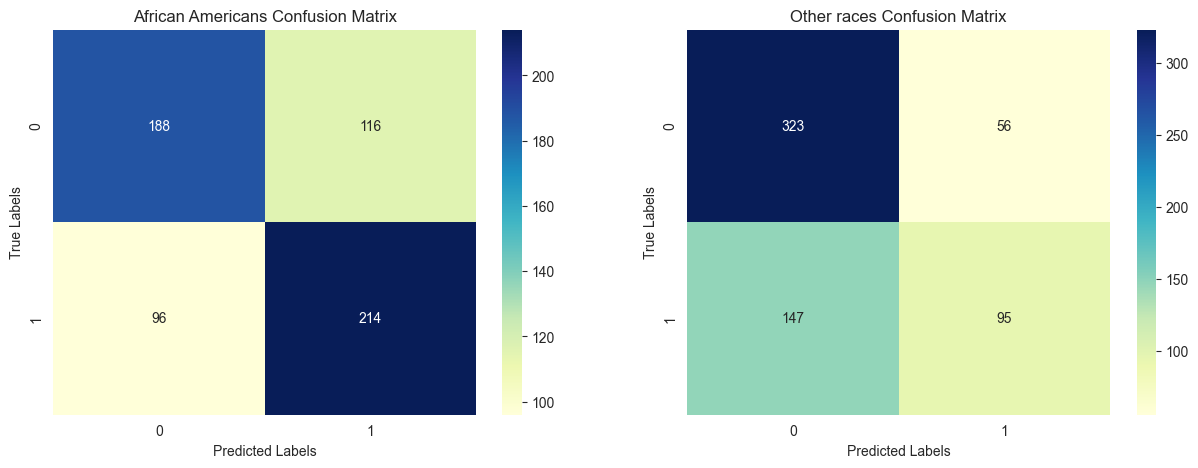

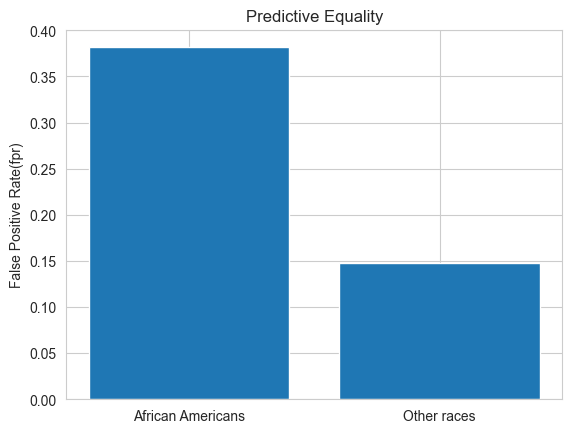

Absolute Difference in TPR: 0.2978
Absolute Difference in TNR: 0.2338
The model does not exhibit balanced Equalized Odds.


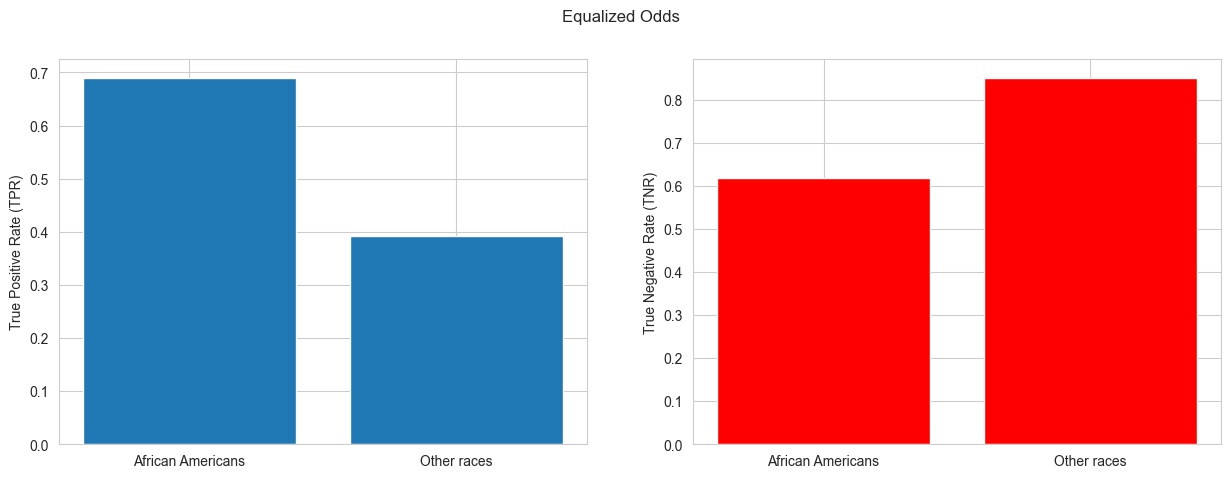

In [31]:

taxonomy_function(class_1_preds=african_americans_predictions, class_1_labels=african_americans_labels,class_1_name='African Americans', class_2_preds=other_races_predictions, class_2_labels=other_races_labels, class_2_name='Other races')

# General conclusions
### Fairness Evaluation and Equalized Odds Metric

In the context of evaluating fairness in predictive models, one crucial metric is Equalized Odds. This metric assesses whether a model's predictions are equally accurate across different demographic groups, particularly focusing on the true positive rate (TPR) and true negative rate (TNR) for each group.

#### Approach and Choices:
1. **Metric Selection:** The decision to use Equalized Odds as a fairness metric stems from its ability to highlight disparities in how the model treats different groups regarding true positive and true negative classifications.

2. **Visual Representation:** I chose to create a bar chart to visually represent the TPR and TNR for African American individuals compared to other racial groups. This visualization aids in understanding the disparities and biases present in the model's predictions.

#### Results and Interpretation:
- **High TPR for African Americans:** The model shows a high TPR for African Americans, indicating that it effectively identifies genuine high-risk cases within this group.
  
- **Low TNR for African Americans:** Conversely, the TNR for African Americans is lower, suggesting that the model tends to misclassify low-risk individuals as high-risk among African Americans.

#### Fairness Evaluation:
- **Bias Identification:** The disparity in TPR and TNR between racial groups signals potential biases in the model. These biases could arise from various factors such as imbalanced training data or biased features used during model training.

- **Mitigation Strategies:** To address these biases, reevaluation of the dataset, feature engineering, and model recalibration are necessary. Fairness-aware machine learning techniques and regular audits can help mitigate biases and ensure fair predictions across all demographic groups.

#### Conclusion:
The goal of this fairness evaluation using the Equalized Odds metric is to highlight areas where the model shows biases and disparities in prediction accuracy among different racial groups. By identifying these issues and implementing corrective measures, we aim to achieve fair and accurate predictions, ultimately promoting fairness and equity in decision-making processes.